#Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Data cleaning
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


##Customer Distribution by Region

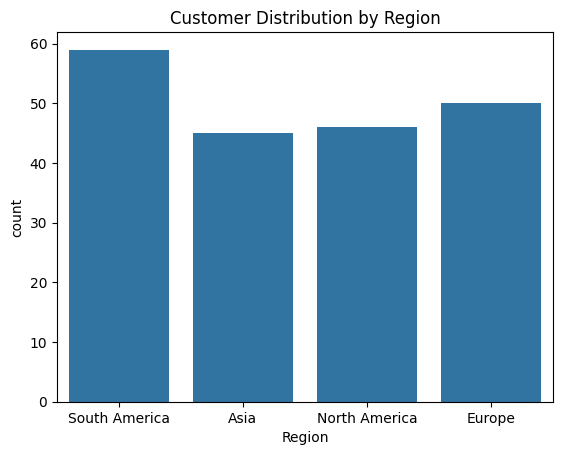

In [ ]:
sns.countplot(data=customers, x='Region')
plt.title("Customer Distribution by Region")
plt.show()

##Top 5 products by quantity sold

In [ ]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 products by quantity sold:\n", top_products)

Top 5 products by quantity sold:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


##Customer Signup Trends

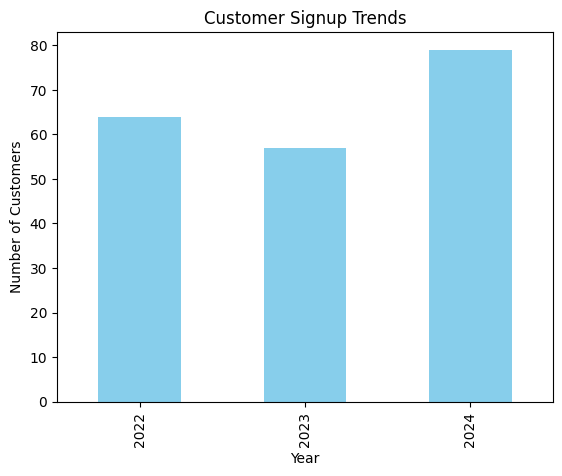

In [ ]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind='bar', title='Customer Signup Trends', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()

##Top Product Categories by Revenue

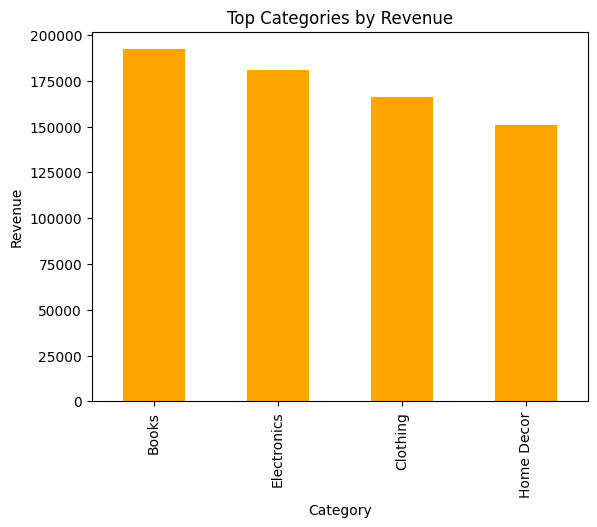

In [ ]:
merged_data = transactions.merge(products, on='ProductID')
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Top Categories by Revenue', color='orange')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

##Monthly Sales Trends

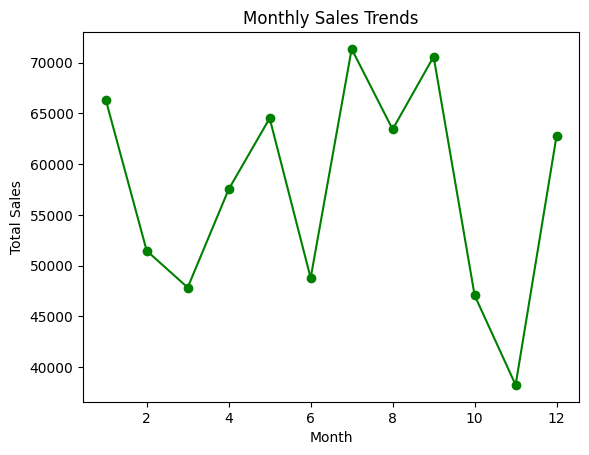

In [ ]:
transactions['Month'] = transactions['TransactionDate'].dt.month

monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trends', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

##Region-wise Revenue

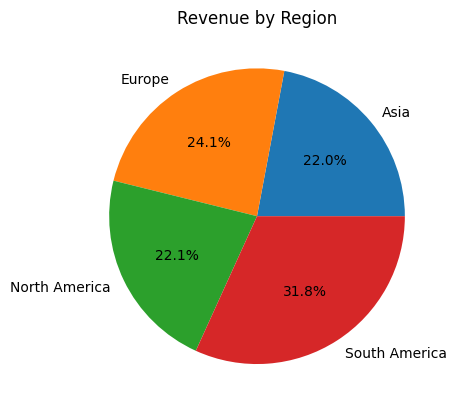

In [ ]:
region_data = transactions.merge(customers, on='CustomerID')

region_revenue = region_data.groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='pie', autopct='%1.1f%%', title='Revenue by Region')
plt.ylabel('')
plt.show()
